<span style="font-size: 24px;">Visualize the loss curves for classification</span>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

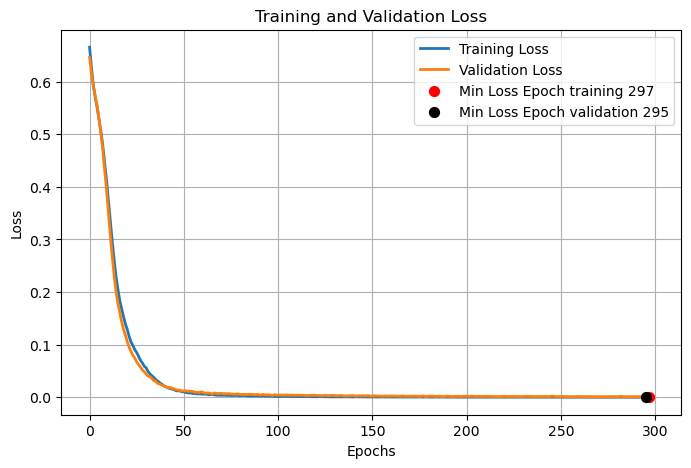

In [5]:
history = np.load("../src/history/cnn_training_history.npy", allow_pickle=True).item()


# Plot training & validation loss
plt.figure(figsize=(8, 5))
plt.plot(history["loss"], label="Training Loss", linewidth=2)
plt.plot(history["val_loss"], label="Validation Loss", linewidth=2)
plt.scatter(np.argmin(history["loss"]), np.min(history["loss"]), color="red", s=50, zorder=5, label=f"Min Loss Epoch training {np.argmin(history['loss'])}")
plt.scatter(np.argmin(history["val_loss"]), np.min(history["val_loss"]), color="black", s=50, zorder=5, label=f"Min Loss Epoch validation {np.argmin(history['val_loss'])}")
plt.xlabel("Epochs")
plt.ylabel("Loss")
#plt.yscale('log')
plt.title("Training and Validation Loss")
plt.legend()
plt.grid(True)
plt.show()